### 1. 提升算法,过程

$$D_1=(w_{l1},w_{l2},..,w_{lN}),i=1,2,...,N$$

$$G_M(x):X ->\{-1,1\}$$

$$e_m=\sum_{i=1}^{N}{w_{mi}I(G_m(x_i)\ne y_i)}$$

$$\alpha _m=0.5*\log{\frac{1-e_m}{e_m}}$$

$$w_{m+1,i}=\frac{w_{mi}}{Z_m}\exp(-\alpha_my_iG_m(x_i)),i=1,2,..,N$$

$$Z_m=\sum_{i=1}^{N}{w_{mi}}\exp(-\alpha_my_iG_m(x_i))$$

$$f(x)=\sum _{m=1}^{M}{\alpha_mG_m(x)}$$

$$G(x)=sign(\sum _{m=1}^{M}{\alpha_mG_m(x)})$$

### 2. 前向分布算法

$$f(x)=\sum _{m=1}^{N}{\beta_mb(x;\gamma _m)}$$

$$\min_{\beta_m,\gamma_m}\sum_{i=1}^{M}{L(y_i,\sum_{m=1}^{M}{\beta_mb(x_i;\gamma_m)})}$$

$$\min_{\beta,\gamma}\sum_{i=1}^{M}{L(y_i,{\beta b(x_i;\gamma)})}$$

### 3. 提升树

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble

##### 函数介绍

##### ensemble.AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

 ##### ensemble.AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)

  1）base_estimator：AdaBoostClassifier和AdaBoostRegressor都有，即我们的弱分类学习器或者弱回归学习器。理论上可以选择任何一个分类或者回归学习器，不过需要支持样本权重。我们常用的一般是CART决策树或者神经网络MLP。默认是决策树，即AdaBoostClassifier默认使用CART分类树DecisionTreeClassifier，而AdaBoostRegressor默认使用CART回归树DecisionTreeRegressor。另外有一个要注意的点是，如果我们选择的AdaBoostClassifier算法是SAMME.R，则我们的弱分类学习器还需要支持概率预测，也就是在scikit-learn中弱分类学习器对应的预测方法除了predict还需要有predict_proba。
       
       
 2）algorithm：这个参数只有AdaBoostClassifier有。主要原因是scikit-learn实现了两种Adaboost分类算法，SAMME和SAMME.R。两者的主要区别是弱学习器权重的度量，SAMME使用了和我们的原理篇里二元分类Adaboost算法的扩展，即用对样本集分类效果作为弱学习器权重，而SAMME.R使用了对样本集分类的预测概率大小来作为弱学习器权重。由于SAMME.R使用了概率度量的连续值，迭代一般比SAMME快，因此AdaBoostClassifier的默认算法algorithm的值也是SAMME.R。我们一般使用默认的SAMME.R就够了，但是要注意的是使用了SAMME.R， 则弱分类学习器参数base_estimator必须限制使用支持概率预测的分类器。SAMME算法则没有这个限制。
       
       
   3）loss：这个参数只有AdaBoostRegressor有，Adaboost.R2算法需要用到。有线性‘linear’, 平方‘square’和指数 ‘exponential’三种选择, 默认是线性，一般使用线性就足够了，除非你怀疑这个参数导致拟合程度不好。这个值的意义在原理篇我们也讲到了，它对应了我们对第k个弱分类器的中第i个样本的误差的处理，即：如果是线性误差，则$e_{ki}=\frac{|y_i−G_k(xi)}{|E_k}$；如果是平方误差，则$e_{ki}=\frac{(y_i−G_k(x_i))^2}{E_k^2}$，如果是指数误差，则$e_{ki}=1− exp(\frac{−y_i+G_k(x_i)}{E_k})$，$E_k$为训练集上的最大误差$E_k=\max{|y_i−G_k(x_i)|}, \ \ i=1,2...m$
       
       
 4) n_estimators： AdaBoostClassifier和AdaBoostRegressor都有，就是我们的弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是50。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。
      
      
  5) learning_rate:  AdaBoostClassifier和AdaBoostRegressor都有，即每个弱学习器的权重缩减系数ν，在原理篇的正则化章节我们也讲到了，加上了正则化项，我们的强学习器的迭代公式为$f_k(x)=f_{k−1}(x)+v\alpha_k G_k(x)$。ν的取值范围为0<ν≤1。对于同样的训练集拟合效果，较小的ν意味着我们需要更多的弱学习器的迭代次数。通常我们用步长和迭代最大次数一起来决定算法的拟合效果。所以这两个参数n_estimators和learning_rate要一起调参。一般来说，可以从一个小一点的ν开始调参，默认是1。

In [20]:
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])
# dataArr, labelArr = loadDataSet("input/7.AdaBoost/horseColicTraining2.txt")

In [52]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

In [53]:
regr_1.score(X,y),regr_2.score(X,y)

(0.9424758076995575, 0.9913671624299397)

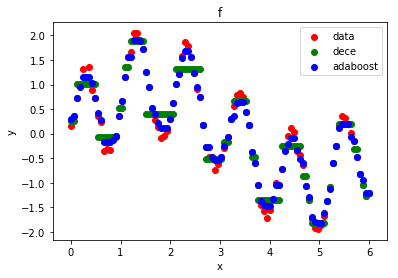

In [54]:
plt.scatter(X,y,c='r',label='data')
plt.scatter(X,y_1,c='g',label='dece')
plt.scatter(X,y_2,c='b',label='adaboost')
plt.xlabel('x')
plt.ylabel('y')
plt.title('f')
plt.legend()
plt.show()

In [61]:
regr_2.

<bound method AdaBoostRegressor.staged_predict of AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=<mtrand.RandomState object at 0x0000021A4E8D6438>)>

#### 保存决策树

In [57]:
tree.export_graphviz(regr_1,out_file='reg2.dot')

In [58]:
import os
os.system(r'F:\app\graphviz\bin\dot reg2.dot -Tpdf -o tree.pdf')

0